In [66]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
np.set_printoptions(precision=8, suppress=True)
mpl.style.use('dark_background')

## 0: Encode full MNIST dataset

In [2]:
# import MNIST data set with 60,000 28x28 training images
# and 10,000 28x28 testing images (y's are labels that aren't needed)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize pixel brightnesses from 0-255 -> (0,1)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# Have d = 28*28 = 784 as the dimensionality of the input vectors.
# Encode these vectors with dxn random matrix A, where n = 5 * d
A = np.random.rand(784,5*784)

# reshape training and test data from (N, 28, 28) -> (N, 784)
x_train = np.reshape(x_train, (-1, 784))
x_test = np.reshape(x_test, (-1, 784))

# rename original vectors as y_train and y_test, as these should
# be the output of the networks
y_train = x_train.copy()
y_test = x_test.copy()

# encode x_train and x_test by right-multiplying A
# x.shape = (N, d), A.shape = (d, n) -> output shape of (N, n)
x_train = x_train @ A
x_test = x_test @ A

In [4]:
# just a check to see if A is full rank
np.linalg.matrix_rank(A)

784

In [ ]:
'''
# save encoded data to .npz archive
np.savez('normally-encoded-mnist.npz', x_train=x_train,
        x_test=x_test, y_train=y_train,
        y_test=y_test, A=A)
'''

In [ ]:
'''
# import encoded data from .npz archive
with np.load('normally-encoded-mnist.npz') as data:
    x_train = data['x_train']
    x_test = data['x_test']
    y_train = data['x_train_encoded']
    y_test = data['x_test_encoded']
    A = data['A']
'''

## 1:  Full-size (28x28) MNIST dataset

### 1.0: Nonlinear network to overfit a subset of the data
#### Results - Unlike previous attempts, the network successfully converges to the original images on the training data. This network is larger than before, and also used the SGD as the optimizer instead of Adam. Was able to get it to discriminate up to a subset of size 100, but trying 1000 gave the same superimposed result as before.

In [ ]:
# deep, nonlinear network with MeanSquaredError
model10 = tf.keras.Sequential([
    tf.keras.layers.Dense(2000, activation='relu',
                          input_shape=(3920,)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(784)
])
loss_fn = tf.keras.losses.MeanSquaredError()
model10.compile(tf.keras.optimizers.SGD(),
             loss=loss_fn)

In [ ]:
# training
subset_size = 100
history = model11.fit(x_train[:subset_size], 
            y_train[:subset_size], 
            validation_split=0.1,
            epochs=3000, verbose=0)


### 1.1: Michael's much larger neural network
#### Results - Successfully recreates test images after only being trained on ~100 images.

In [6]:
# deep, nonlinear network with MeanSquaredError
model11 = tf.keras.Sequential([
    tf.keras.layers.Dense(65000, activation='relu',
                          input_shape=(5*784,), use_bias=True),
    tf.keras.layers.Dense(784)
])
loss_fn = tf.keras.losses.MeanSquaredError()

model11.compile(tf.keras.optimizers.SGD(learning_rate=.05),
             loss=loss_fn) # 1 layer with 65000

In [22]:
# training
history = model11.fit(  x_train[1000:2000], 
                        y_train[1000:2000], 
                        validation_split=0.1,
                        epochs=20, verbose=1)

# plot loss history
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label='validation loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')
ax.set_yscale('log')
ax.legend()
plt.show()

Epoch 1/20
29/29 [==============================] - 23s 796ms/step - loss: 0.0207 - val_loss: 0.0212
Epoch 2/20
29/29 [==============================] - 24s 843ms/step - loss: 0.0199 - val_loss: 0.0204
Epoch 3/20
29/29 [==============================] - 25s 852ms/step - loss: 0.0193 - val_loss: 0.0217
Epoch 4/20
29/29 [==============================] - 26s 885ms/step - loss: 0.0188 - val_loss: 0.0201
Epoch 5/20
29/29 [==============================] - 26s 880ms/step - loss: 0.0184 - val_loss: 0.0192
Epoch 6/20
29/29 [==============================] - 25s 848ms/step - loss: 0.0179 - val_loss: 0.0195
Epoch 7/20
29/29 [==============================] - 25s 852ms/step - loss: 0.0176 - val_loss: 0.0209
Epoch 8/20
29/29 [==============================] - 25s 850ms/step - loss: 0.0174 - val_loss: 0.0200
Epoch 9/20
29/29 [==============================] - 25s 850ms/step - loss: 0.0171 - val_loss: 0.0192
Epoch 10/20
29/29 [==============================] - 25s 849ms/step - loss: 0.0168 - val_lo

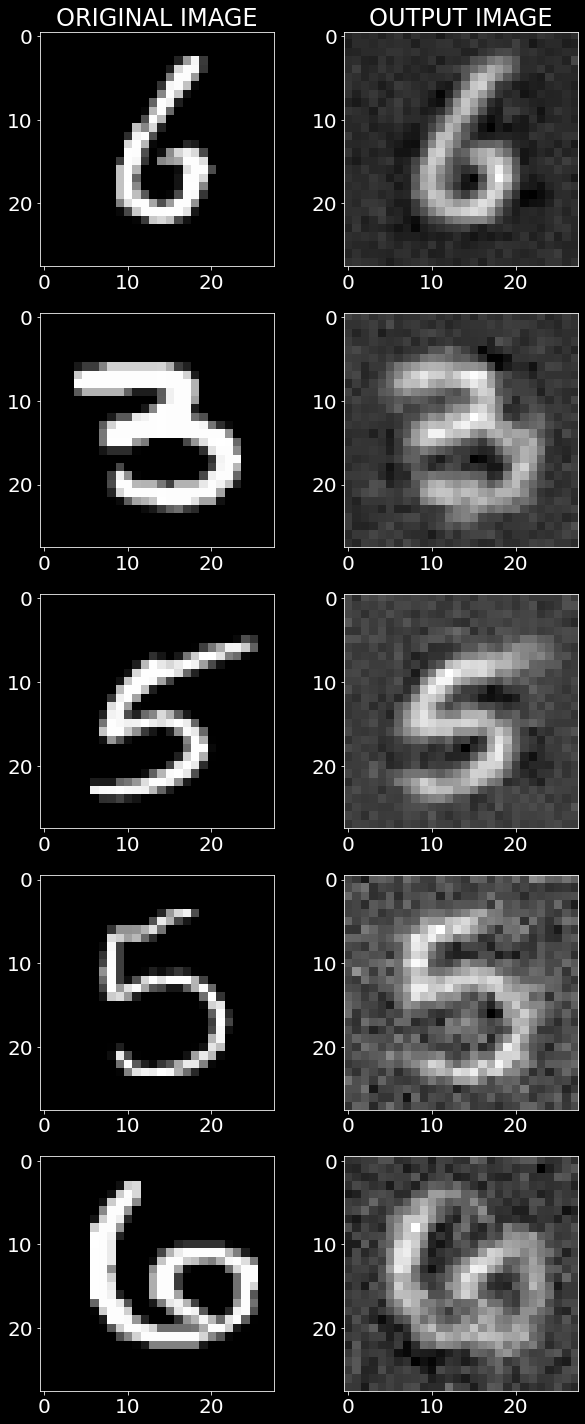

In [61]:
# plot one column with original images and one column with the
# network's output
nrows = 5 # how many pairs of images to show
start_idx = 50 # where in the datasets to slice examples
fig, axs = plt.subplots(nrows,2,figsize=(10,nrows*5))
original_images = np.reshape(y_test[start_idx:start_idx+nrows,:],
                             (nrows,28,28))
output_images = np.reshape(model11(x_test[start_idx:start_idx+nrows,:]), 
                           (nrows,28,28))
 
axs[0,0].set_title('ORIGINAL IMAGE')
axs[0,1].set_title('OUTPUT IMAGE')
for i in range(nrows):
    axs[i,0].imshow(original_images[i,:,:],
                    cmap='gray')
    axs[i,1].imshow(output_images[i,:,:],
                    cmap='gray')

### 1.2: Experimenting with learning rates.
#### Results - It seems like having a learning rate higher than ~0.6 causes problems, as the output loss becomes NaN after the first epoch and all the weights go to NaN as well. Other than that, it doesn't seem to make a huge difference

In [ ]:
loss_fn = tf.keras.losses.MeanSquaredError()

# try learning rate of 0.0001
model120 = tf.keras.Sequential([
    tf.keras.layers.Dense(1500, activation='relu', input_shape=(3920,)),
    tf.keras.layers.Dense(784)
])
model120.compile(tf.keras.optimizers.SGD(learning_rate=0.0001),
             loss=loss_fn)

# learning rate of 0.0005
model121 = tf.keras.Sequential([
    tf.keras.layers.Dense(1500, activation='relu', input_shape=(3920,)),
    tf.keras.layers.Dense(784)
])
model121.compile(tf.keras.optimizers.SGD(learning_rate=0.0005),
             loss=loss_fn)

# try learning rate of 0.001
model122 = tf.keras.Sequential([
    tf.keras.layers.Dense(1500, activation='relu', input_shape=(3920,)),
    tf.keras.layers.Dense(784)
])
model122.compile(tf.keras.optimizers.SGD(learning_rate=0.001),
             loss=loss_fn)

# try learning rate of 0.005
model123 = tf.keras.Sequential([
    tf.keras.layers.Dense(1500, activation='relu', input_shape=(3920,)),
    tf.keras.layers.Dense(784)
])
model123.compile(tf.keras.optimizers.SGD(learning_rate=0.005),
             loss=loss_fn)


In [ ]:
subset_size = 1000
print('Learning rate=0.0001')
history0 = model120.fit(x_train[:subset_size], 
            y_train[:subset_size], 
            validation_split=0.1,
            epochs=100,
            batch_size=10,
            verbose=0)
print('Learning rate=0.0005')
history1 = model121.fit(x_train[:subset_size], 
            y_train[:subset_size],
            validation_split=0.1,
            epochs=100,
            batch_size=10,
            verbose=0)
print('Learning rate=0.001')
history2 = model122.fit(x_train[:subset_size], 
            y_train[:subset_size], 
            validation_split=0.1,
            epochs=100,
            batch_size=10,
            verbose=0)
print('Learning rate=0.005')
history3 = model123.fit(x_train[:subset_size], 
            y_train[:subset_size], 
            validation_split=0.1,
            epochs=100,
            batch_size=10,
            verbose=0)

In [ ]:
# plot loss history
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(history0.history['val_loss'], label='val_loss0')
ax.plot(history1.history['val_loss'], label='val_loss1')
ax.plot(history2.history['val_loss'], label='val_loss2')
ax.plot(history3.history['val_loss'], label='val_loss3')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')
ax.legend()
plt.show()

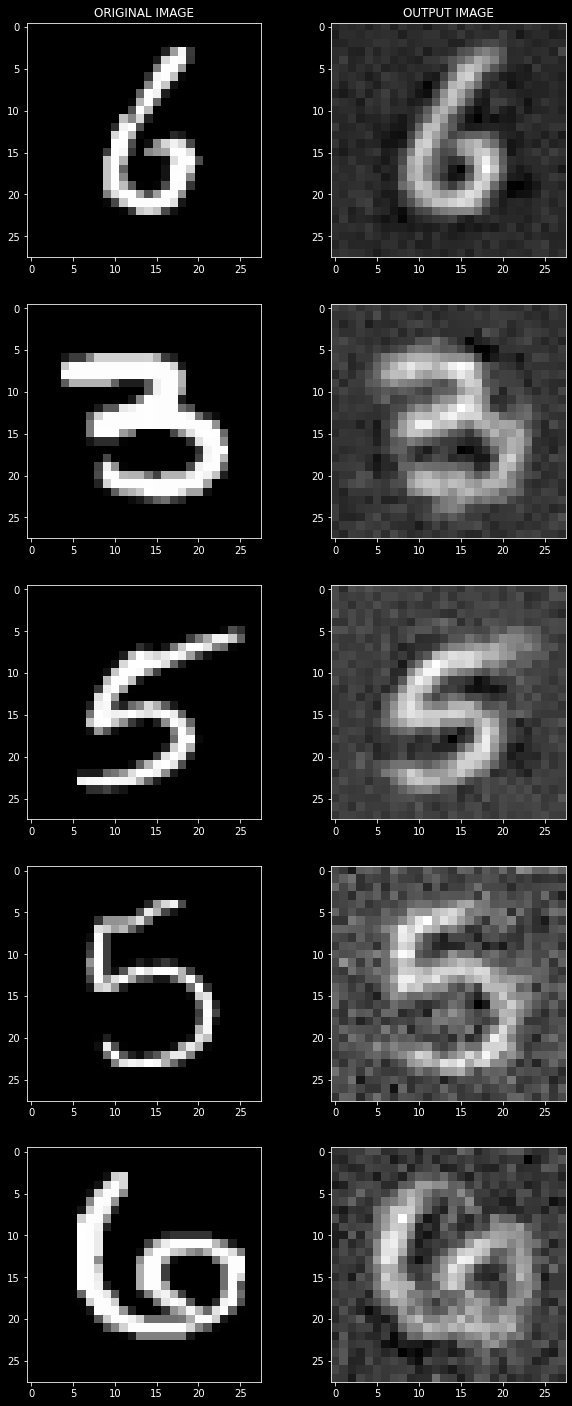

In [39]:
# plot one column with original images and one column with the
# network's output
nrows = 5 # how many pairs of images to show
start_idx = 50 # where in the datasets to slice examples
fig, axs = plt.subplots(nrows,2,figsize=(10,nrows*5))
original_images = np.reshape(y_test[start_idx:start_idx+nrows,:],
                             (nrows,28,28))
output_images = np.reshape(model11(x_test[start_idx:start_idx+nrows,:]), 
                           (nrows,28,28))

axs[0,0].set_title('ORIGINAL IMAGE')
axs[0,1].set_title('OUTPUT IMAGE')
for i in range(nrows):
    axs[i,0].imshow(original_images[i,:,:],
                    cmap='gray')
    axs[i,1].imshow(output_images[i,:,:],
                    cmap='gray')

## 2: Cropped (central 20x20 pixels) MNIST dataset

#### The hypothesis here is that the model on the 5x5 cropped images worked because the activation wasn't concentrated in the center (which still corresponds to a static location in the flattened vector as well), not because the size of the image is important. I think that's the reason the superposition solution is reached, that the network learns to ignore certain pixels (which I guess could be checked by looking at the weight matrix manually). I'm just using the cropped image here because using random input vectors would mean solely relying on the test loss as the only metric, as opposed to being able to judge by eye as well.

### 2.1: Encode cropped MNIST dataset

### 2.2: Nonlinear neural-network with two hidden layers

## 3: Try adding noise to the encoded data

## 4: Comparison of Jacobian with CRLB bound

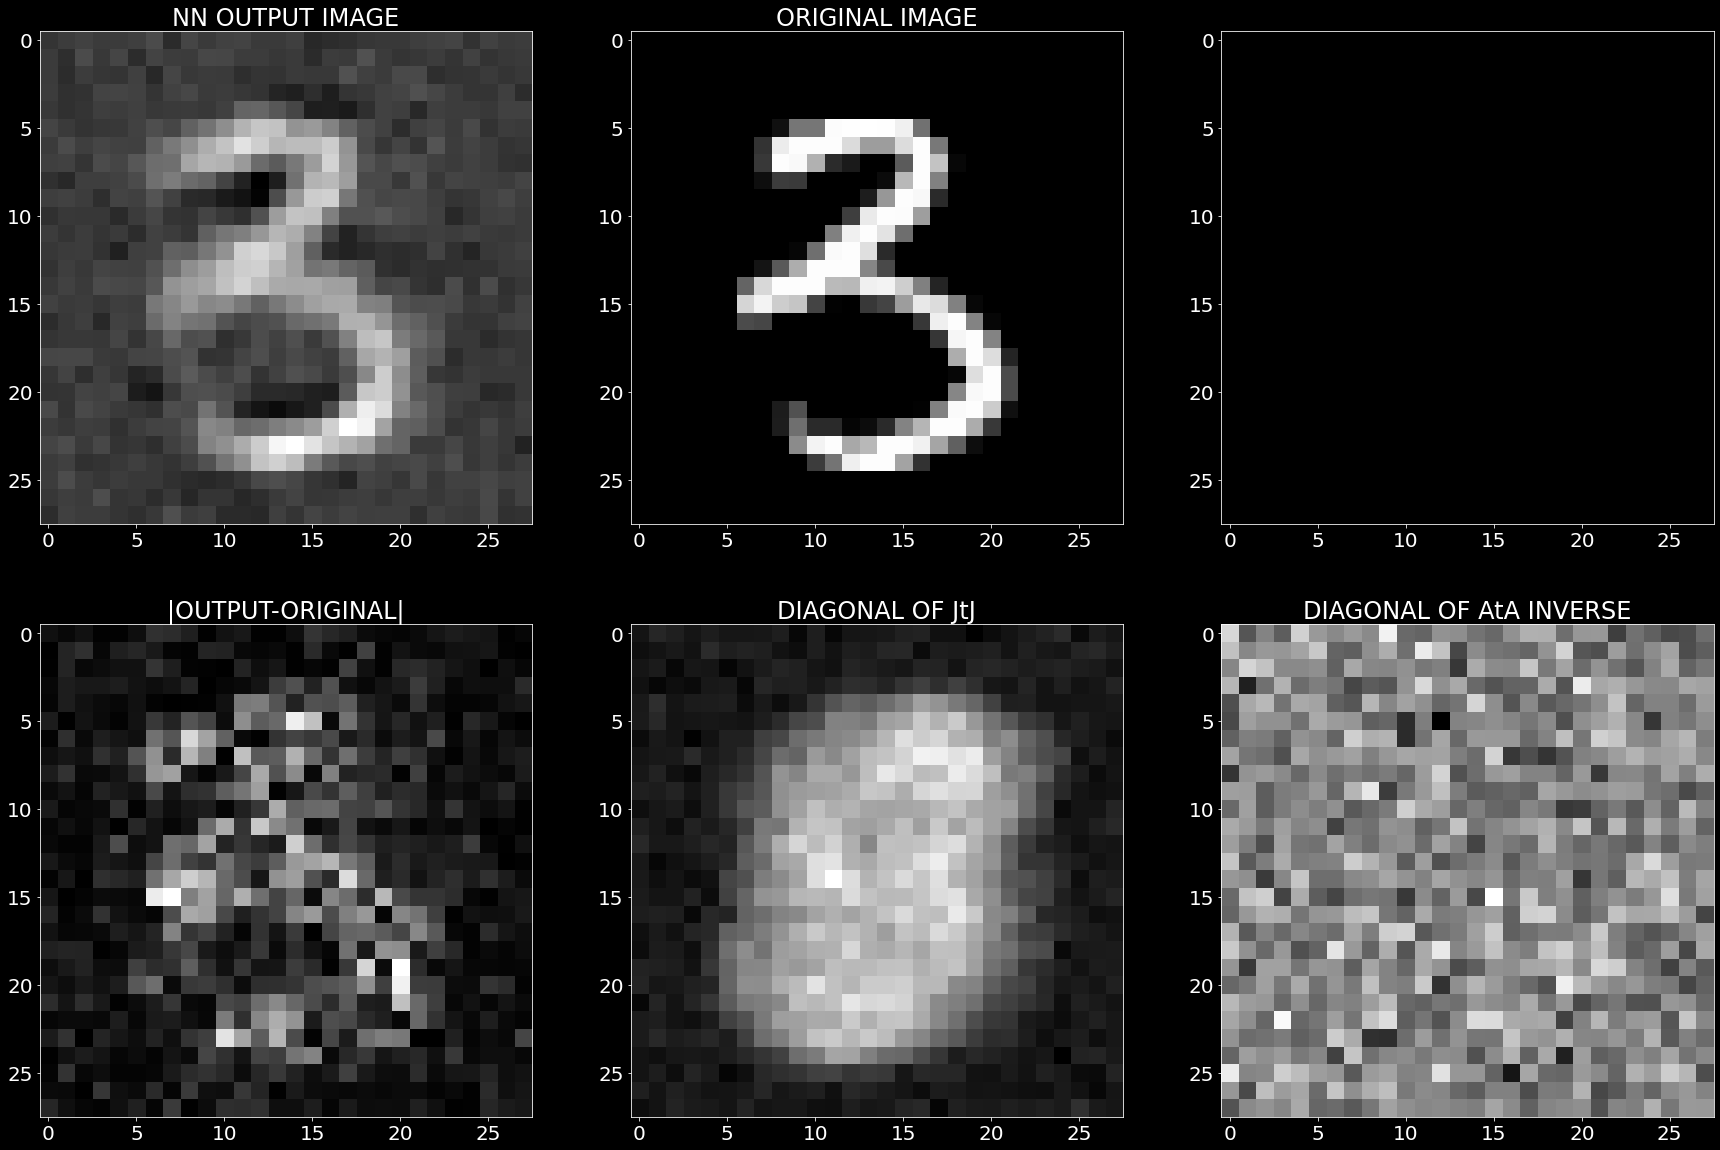

NN OUTPUT IMAGE
[[-0.0330694   0.01728537  0.03608774  0.0041341   0.00532016  0.02866447
   0.09876525 -0.08873487  0.06296815 -0.0027621   0.03619353  0.04839521
  -0.00331554 -0.00269591  0.02826696 -0.10643523 -0.07957931 -0.06402406
  -0.02211398 -0.0141653  -0.0115699   0.02055101  0.04383013  0.05685426
  -0.04637381  0.0402114  -0.00272233  0.01313157]
 [ 0.0012987  -0.07234831  0.09641284 -0.01582473  0.06363882 -0.07810414
   0.05149062  0.00985099  0.00524857  0.07408456  0.06975124  0.01708545
   0.0124848  -0.01896219 -0.00308511 -0.08589549  0.01851499 -0.00353848
   0.13120136  0.00558349 -0.03934879 -0.02098824  0.01638367 -0.03491567
   0.03685185 -0.04430228 -0.00541948  0.00052933]
 [ 0.00382036 -0.07584196  0.01646213 -0.02601534 -0.03609917  0.03565346
  -0.10585833  0.0608074  -0.00661531  0.00596629  0.00084376 -0.07137089
  -0.02868637 -0.04483218 -0.00321114 -0.01379672 -0.00544549  0.13304108
   0.0331063   0.00505978  0.08250083  0.08999892 -0.06891663 -0.043

In [69]:
idx = 5000
x = tf.Variable(x_test[idx:idx+1,:])
with tf.GradientTape() as tape:
    y_out = model11(x)

# output gradient of target w.r.t. sources
j = np.reshape(tape.jacobian(y_out, x), (784, 5*784))
JtJ = np.reshape(np.diagonal(j @ np.transpose(j)), (28,28))
AtA_inv = np.reshape(np.diagonal(np.linalg.inv(A @ np.transpose(A))), (28,28))
y_original = np.reshape(y_test[idx],(28,28))
y_out = np.reshape(y_out[0],(28,28))

mpl.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(2,3,figsize=(30,20))
axs[0,0].set_title('NN OUTPUT IMAGE')
axs[0,0].imshow(y_out, cmap='gray')

axs[0,1].set_title('ORIGINAL IMAGE')
axs[0,1].imshow(y_original, cmap='gray')

# make the image in the 3rd column black
axs[0,2].imshow(np.zeros((28,28)), cmap='gray')

axs[1,0].set_title('|OUTPUT-ORIGINAL|')
axs[1,0].imshow(np.abs(y_out-y_original), cmap='gray')

axs[1,1].set_title('DIAGONAL OF JtJ')
axs[1,1].imshow(JtJ, cmap='gray')

axs[1,2].set_title('DIAGONAL OF AtA INVERSE')
axs[1,2].imshow(AtA_inv, cmap='gray')
plt.show()

# print out actual values as well
print('NN OUTPUT IMAGE')
print(y_out)
print('ORIGINAL IMAGE')
print(y_original)
print('(OUTPUT-ORIGINAL)^2')
print((y_out-y_original)**2)
print('DIAGONAL OF JtJ')
print(JtJ)
print('DIAGONAL OF AtA INVERSE')
print(AtA_inv)


In [68]:
print('JtJ mean')
print(np.mean(JtJ))
print(np.std(JtJ))
print('AtA inverse mean')
print(np.mean(AtA_inv))
print(np.std(AtA_inv))

JtJ mean
0.000358126791788386
0.00019591148599999654
AtA inverse mean
0.00031906943094360036
8.291223757177076e-06


In [70]:
print(JtJ[14,:])

[0.00019814 0.00016758 0.00018454 0.00015956 0.00017511 0.00032037
 0.00035029 0.00047633 0.00051576 0.00058503 0.00074737 0.00084065
 0.00074476 0.0006285  0.00067474 0.0007352  0.00067972 0.00074898
 0.00062338 0.00057968 0.00048888 0.00036841 0.00035791 0.00030776
 0.00024556 0.0001637  0.00021025 0.00020351]


In [71]:
print(JtJ[0,:])

[0.00018303 0.00023488 0.00021572 0.0001877  0.00020963 0.00018871
 0.00019054 0.00019085 0.00021281 0.0001466  0.00021133 0.00014549
 0.00018764 0.00018851 0.00019521 0.00022111 0.00022225 0.00017282
 0.00017264 0.00012654 0.00015911 0.00017999 0.00020367 0.00022239
 0.00024701 0.00015315 0.00020616 0.00018514]
